# 資料說明

In [1]:
import pandas as pd
import numpy as np

In [2]:
readPath = './Data2/ks-projects-201801.csv'
writePath = './Data2/NewData.csv'
Data = pd.read_csv(readPath)

print('----------------------------------------')
print('Columns：', list(Data.columns))

print('----------------------------------------')
print('Shape：', Data.shape)
DataNull = Data.isnull().sum()

print('----------------------------------------')
print('Null-Sum：')
print(DataNull[DataNull>0])

print('----------------------------------------')
print('unique number of each column')
for Col in Data.columns:
    print(Col, '：', len(Data[Col].unique()))
print('----------------------------------------')

# Kickstarter是一間於2009年在美國紐約成立、
# 最初基於美國人後來拓展至各國的產品募資平台，
# 它透過該網站進行公眾募資以提供人們進行創意專案的籌集資金。

# explanation
# ID ： internal kickstarter id
# name ： name of project - A project is a finite work with a clear goal 
# 　　　　that you’d like to bring to life. Think albums, books, or films.
# category ： category
# main_category ： category of campaign
# currency ： currency used to support
# deadline ： deadline for crowdfunding
# goal ： Goal amount in project currency
# launched ： date launched
# pledged ： Pledged amount in the project currency
# state ： Current condition the project is in
# backers ： number of backers
# country ： country pledged from
# usd pledged ： Pledged amount in USD (conversion made by KS)
# usd_pledged_real ： Pledged amount in USD (conversion made by fixer.io api)
# usd_goal_real ： Goal amount in USD

----------------------------------------
Columns： ['ID', 'name', 'category', 'main_category', 'currency', 'deadline', 'goal', 'launched', 'pledged', 'state', 'backers', 'country', 'usd pledged', 'usd_pledged_real', 'usd_goal_real']
----------------------------------------
Shape： (378661, 15)
----------------------------------------
Null-Sum：
name              4
usd pledged    3797
dtype: int64
----------------------------------------
unique number of each column
ID ： 378661
name ： 375765
category ： 159
main_category ： 15
currency ： 14
deadline ： 3164
goal ： 8353
launched ： 378089
pledged ： 62130
state ： 6
backers ： 3963
country ： 23
usd pledged ： 95456
usd_pledged_real ： 106065
usd_goal_real ： 50339
----------------------------------------


# 資料前處理

In [3]:
from sklearn.preprocessing import LabelEncoder
def ConvertTypeToNumber(Data):
#     print('Class：', Data.unique())
    orgLabel = list(Data.unique())
    classLE = LabelEncoder()
    Data = classLE.fit_transform(Data.values)
    NewLabel = list(pd.DataFrame(Data)[0].unique())
    mappingLabel = [orgLabel, NewLabel]
    return Data, mappingLabel

def twoListSort(list1, list2):
    zipped_lists = zip(list1, list2)
    sorted_pairs = sorted(zipped_lists)
    tuples = zip(*sorted_pairs)
    list1, list2 = [ list(tuple) for tuple in  tuples]
    return list1, list2

def LEDef(Data, Type):
    Data[Type], TempLabel = ConvertTypeToNumber(Data[Type])
    TempLabel = twoListSort(TempLabel[1], TempLabel[0])
    print(Type, ' ： ', TempLabel)
    print('')
    return Data

def cutDef(Data, Type, qcutNum):
    Data[Type] = pd.qcut(Data[Type], qcutNum)
    Data[Type], TempLabel = ConvertTypeToNumber(Data[Type])
    TempLabel = twoListSort(TempLabel[1], TempLabel[0])
    print(Type, ' ： ', TempLabel)
    print(Type, ' - counts：')
    print(Data[Type].value_counts(normalize=True))
    print('')
    return Data

import matplotlib.pyplot as plt
def plotHistogram(Data, title, xLabel, yLabel):
    fig, ax = plt.subplots(figsize = (4, 3))
    DataCounts = Data.value_counts(normalize=False)
    x = DataCounts.index
    y = DataCounts
    ax.bar(x, y)
    ax.set_title(title)
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    plt.show()

----------------------------------------
Before：
Columns： ['main_category', 'currency', 'deadline', 'launched', 'state', 'backers', 'country', 'usd_pledged_real', 'usd_goal_real']

Shape： (378661, 9)

NewData：
  main_category currency    deadline             launched     state  backers  \
0    Publishing      GBP  2015-10-09  2015-08-11 12:12:28    failed        0   
1  Film & Video      USD  2017-11-01  2017-09-02 04:43:57    failed       15   
2  Film & Video      USD  2013-02-26  2013-01-12 00:20:50    failed        3   
3         Music      USD  2012-04-16  2012-03-17 03:24:11    failed        1   
4  Film & Video      USD  2015-08-29  2015-07-04 08:35:03  canceled       14   

  country  usd_pledged_real  usd_goal_real  
0      GB               0.0        1533.95  
1      US            2421.0       30000.00  
2      US             220.0       45000.00  
3      US               1.0        5000.00  
4      US            1283.0       19500.00  
---------------------------------------

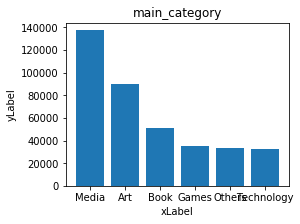

currency
['Other' 'USD']
USD      0.780025
Other    0.219975
Name: currency, dtype: float64


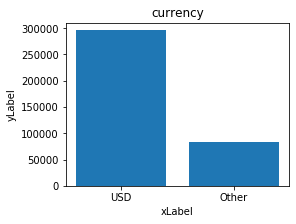

state
['failed' 'Exception' 'successful']
failed        0.522153
successful    0.353762
Exception     0.124085
Name: state, dtype: float64


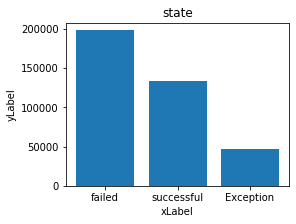

country
['Other' 'US']
US       0.772794
Other    0.227206
Name: country, dtype: float64


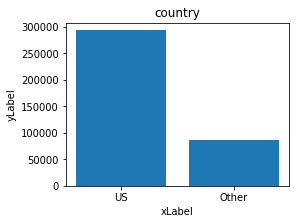

----------------------------------------
----------------------------------------
LEDef
main_category  ：  ([0, 1, 2, 3, 4, 5], ['Art', 'Book', 'Games', 'Media', 'Others', 'Technology'])

currency  ：  ([0, 1], ['Other', 'USD'])

state  ：  ([0, 1, 2], ['Exception', 'failed', 'successful'])

country  ：  ([0, 1], ['Other', 'US'])

----------------------------------------
----------------------------------------
DateTime
----------------------------------------
----------------------------------------
cut
backers  ：  ([0, 1, 2], [Interval(-0.001, 3.0, closed='right'), Interval(3.0, 34.0, closed='right'), Interval(34.0, 219382.0, closed='right')])
backers  - counts：
0    0.342620
2    0.332326
1    0.325053
Name: backers, dtype: float64

usd_pledged_real  ：  ([0, 1, 2], [Interval(-0.001, 105.0, closed='right'), Interval(105.0, 2295.0, closed='right'), Interval(2295.0, 20338986.27, closed='right')])
usd_pledged_real  - counts：
0    0.333464
2    0.333311
1    0.333224
Name: usd_pledged_real, 

In [4]:
NewData = Data.drop(columns=['ID', 'name', 'category', 'goal', 'pledged', 'usd pledged'])
print('----------------------------------------')
print('Before：')
print('Columns：', list(NewData.columns))
print('')
print('Shape：', NewData.shape)
print('')
print('NewData：')
print(NewData.head(5))
print('----------------------------------------')

print('----------------------------------------')
# main_category
# Film & Video、Music、Theater、Photography
# Publishing、Comics
# Games
# Technology
# Design、Art、Fashion、Crafts
# Food、Journalism、Dance
NewData.loc[(NewData['main_category'] == 'Film & Video') |
         (NewData['main_category'] == 'Music') |
         (NewData['main_category'] == 'Theater') |
         (NewData['main_category'] == 'Photography'), 'main_category'] = 'Media'

NewData.loc[(NewData['main_category'] == 'Publishing') |
         (NewData['main_category'] == 'Comics'), 'main_category'] = 'Book'

NewData.loc[(NewData['main_category'] == 'Design') |
         (NewData['main_category'] == 'Art') |
         (NewData['main_category'] == 'Fashion') |
         (NewData['main_category'] == 'Crafts'), 'main_category'] = 'Art'

NewData.loc[(NewData['main_category'] == 'Food') |
         (NewData['main_category'] == 'Journalism') |
         (NewData['main_category'] == 'Dance'), 'main_category'] = 'Others'

print('main_category')
print(NewData['main_category'].unique())
print(NewData['main_category'].value_counts(normalize=True))
plotHistogram(NewData['main_category'], 'main_category', 'xLabel', 'yLabel')

# currency： USD AND Other
NewData.loc[NewData['currency'] != 'USD', 'currency'] = 'Other'
print('currency')
print(NewData['currency'].unique())
print(NewData['currency'].value_counts(normalize=True))
plotHistogram(NewData['currency'], 'currency', 'xLabel', 'yLabel')

# state：failed、successful AND Exception
NewData.loc[(NewData['state'] != 'failed') & (NewData['state'] != 'successful'), 'state'] = 'Exception'
print('state')
print(NewData['state'].unique())
print(NewData['state'].value_counts(normalize=True))
plotHistogram(NewData['state'], 'state', 'xLabel', 'yLabel')

# currency： USD AND Other
NewData.loc[NewData['country'] != 'US', 'country'] = 'Other'
print('country')
print(NewData['country'].unique())
print(NewData['country'].value_counts(normalize=True))
plotHistogram(NewData['country'], 'country', 'xLabel', 'yLabel')
print('----------------------------------------')

print('----------------------------------------')
print('LEDef')
NewData = LEDef(NewData, 'main_category')
NewData = LEDef(NewData, 'currency')
NewData = LEDef(NewData, 'state')
NewData = LEDef(NewData, 'country')
print('----------------------------------------')
    
print('----------------------------------------')
print('DateTime')
# DateTime
# launched's hours removed
# print(NewData['launched'].str.split(' ', expand=True).loc[:, 0])
# NewData['launched'] = NewData['launched'].str.split(' ', expand=True).loc[:, 0]
# print(NewData['launched'])

# launched convert to timestamp
NewData['launched'] = pd.to_datetime(NewData['launched']).values.astype(np.int64) // 10 ** 9
# print(NewData['launched'])

# deadline convert to timestamp
NewData['deadline'] = pd.to_datetime(NewData['deadline']).values.astype(np.int64) // 10 ** 9
# print(NewData['deadline'])

# dealine - launched
NewData['duration'] = NewData['deadline'] - NewData['launched']
# print(NewData['duration'])

NewData = NewData.drop(columns=['launched', 'deadline'])
print('----------------------------------------')

print('----------------------------------------')
print('cut')
NewData = cutDef(NewData, 'backers', 3)
NewData = cutDef(NewData, 'usd_pledged_real', 3)
NewData = cutDef(NewData, 'usd_goal_real', 3)
NewData = cutDef(NewData, 'duration', 3)
print('----------------------------------------')

print('----------------------------------------')
print('After：')
print('Columns：', list(NewData.columns))
print('')
print('Shape：', NewData.shape)
print('')
print('NewData：')
print(NewData.head(5))
print('----------------------------------------')

# Label Encode to OneHot Encode

In [5]:
NewData2 = pd.DataFrame()
for Col in list(NewData.columns):
    DataTemp = pd.get_dummies(NewData[Col], prefix = Col)
    NewData2 = pd.concat([NewData2, DataTemp], axis=1)
print(NewData2)

        main_category_0  main_category_1  main_category_2  main_category_3  \
0                     0                1                0                0   
1                     0                0                0                1   
2                     0                0                0                1   
3                     0                0                0                1   
4                     0                0                0                1   
...                 ...              ...              ...              ...   
378656                0                0                0                1   
378657                0                0                0                1   
378658                0                0                0                1   
378659                0                0                0                0   
378660                1                0                0                0   

        main_category_4  main_category_5  currency_0  currency_

# 輸出資料

In [6]:
NewData2.to_csv(writePath, index = False)